<a href="https://colab.research.google.com/github/oggyu/MachineLearning/blob/master/LogisticCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 



Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('drive/My Drive//dataset/breasCancerDataset.csv')
print(data.head)
data = data.drop(['Unnamed: 32', 'id'],axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'],axis = 1)
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.15, random_state = 42) 
x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 

trainData =  x.iloc[:500,:]
testData =  x.iloc[500:,:]


<bound method NDFrame.head of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>


In [ ]:
print(x_train.shape)
print(y_train.shape)

(30, 483)
(483,)


In [ ]:

# dataset for boston housing 
boston_housing = keras.datasets.boston_housing
(train_data, train_labels) ,(test_data, test_labels) = boston_housing.load_data() 
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=features)
df.head()
# normalize training data 
nonNormalized = train_data
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = (train_data - mean) / std

57344/57026 [==============================] - 0s 3us/step


Cost after iteration  0:  1.980112
Cost after iteration  10:  0.412897
Cost after iteration  20:  0.353169
Cost after iteration  30:  0.314707
Cost after iteration  40:  0.287649
Cost after iteration  50:  0.267402
Cost after iteration  60:  0.251561
Cost after iteration  70:  0.238745
Cost after iteration  80:  0.228103
Cost after iteration  90:  0.219082
Cost after iteration  100:  0.211307
Cost after iteration  110:  0.204513
Cost after iteration  120:  0.198506
Cost after iteration  130:  0.193144
Cost after iteration  140:  0.188315
Cost after iteration  150:  0.183936
Cost after iteration  160:  0.179939
Cost after iteration  170:  0.176269
Cost after iteration  180:  0.172884
Cost after iteration  190:  0.169747
Cost after iteration  200:  0.166828
Cost after iteration  210:  0.164103
Cost after iteration  220:  0.161550
Cost after iteration  230:  0.159152
Cost after iteration  240:  0.156892
Cost after iteration  250:  0.154758
Cost after iteration  260:  0.152738
Cost after i

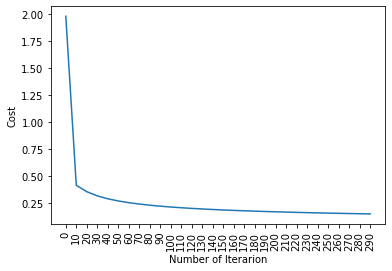

train accuracy: 96.8944099378882 %
test accuracy: 96.51162790697674 %


In [ ]:
def initializeWeightBias(dimension):
  #w = np.full((dimension,1), 0.01)
  w = np.random.rand(dimension,1)
  b = 0.0 
  return w,b 

def sigmoid(x):
  return 1/(1+np.exp(-x)) 

def forward_backward_prop(w,b,x_train,y_train):
  # w.T is [1 x n] x_train is [n x M] M is number of sample  n is number of feature
  z = np.dot(w.T,x_train) + b       # z is 1 x M    
  y_head = sigmoid(z) 
  loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
  cost = (np.sum(loss)) / x_train.shape[1]

  weightGrad = np.dot(x_train,(y_head - y_train).T) / x_train.shape[1]
  biasGrad = np.sum((y_head - y_train) / x_train.shape[1])
  
  gradient = {"weightGrad": weightGrad, "biasGrad": biasGrad}
  
  return cost, gradient

def update(w,b,x_train,y_train,learningR,iter):
  cost_list = []
  cost_list2 = [] 

  index = [] 

  for i in range(iter):
    cost,gradients = forward_backward_prop(w,b,x_train,y_train)
    cost_list.append(cost)
    w = w - learningR * gradients["weightGrad"]
    b = b - learningR * gradients["biasGrad"]
    
    if i % 10 == 0: 
      cost_list2.append(cost) 
      index.append(i) 
      print ("Cost after iteration % i: % f" %(i, cost))  

  parameters = {"weight": w, "bias": b}
  plt.plot(index, cost_list2) 
  plt.xticks(index, rotation ='vertical') 
  plt.xlabel("Number of Iterarion") 
  plt.ylabel("Cost") 
  plt.show() 
  return parameters, gradients, cost_list 

def predict(w, b, x_test): 
  # x_test is a input for forward propagation 
  z = sigmoid(np.dot(w.T, x_test)+b) 
  Y_prediction = np.zeros((1, x_test.shape[1])) 
  
  # if z is bigger than 0.5, our prediction is sign one (y_head = 1), 
  # if z is smaller than 0.5, our prediction is sign zero (y_head = 0), 
  for i in range(z.shape[1]): 
    if z[0, i]<= 0.5: 
      Y_prediction[0, i] = 0
    else: 
      Y_prediction[0, i] = 1
  return Y_prediction 

def logistic_regression(x_train, y_train, x_test, y_test,  
                        learning_rate,  num_iterations): 
  
    dimension = x_train.shape[0] 
    w, b = initializeWeightBias(dimension) 
      
    parameters, gradients, cost_list = update( 
        w, b, x_train, y_train, learning_rate, num_iterations) 
      
    y_prediction_test = predict( 
        parameters["weight"], parameters["bias"], x_test) 
    y_prediction_train = predict( 
        parameters["weight"], parameters["bias"], x_train) 
  
    # train / test Errors 
    print("train accuracy: {} %".format( 
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100)) 
    print("test accuracy: {} %".format( 
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)) 
      
logistic_regression(x_train, y_train, x_test,  
                    y_test, learning_rate = 1, num_iterations = 300)

In [ ]:
#define the logistic loss function 
def forwardPass(input,weights):
  result = np.dot(input,weights)
  return result 


def logisticLoss(input,weights,labels,reg):
  labels = np.reshape(labels,(-1,1))
  numofSample = input.shape[0]
  weightedSum = forwardPass(input,weights)
  loss = -1 * np.multiply(labels,np.log10(sigmoid(weightedSum))) - np.multiply((1-labels),np.log10(1-sigmoid(weightedSum))) 
  loss = np.sum(loss, axis = 0) / numofSample
  
  # calculate L2 regularization 
  r = np.sum(np.multiply(weights,weights), axis = 0) * reg / numofSample / 2
  loss = r + loss

  # gradient for all 13 weights 
  gradient = np.dot((sigmoid(weightedSum)-labels).T,input) 
  gradient = (gradient.T - reg*weights) / numofSample  
  return loss,gradient  



#input is (1 x N)  weights is (N x 1)


In [ ]:
input = train_data
weights = np.random.rand(train_data.shape[1],1)
labels = train_labels
reg = 100 ;
labels = np.reshape(labels,(-1,1))

numofSample = input.shape[0]
weightedSum = forwardPass(input,weights)
loss = -1 * np.multiply(labels,np.log10(sigmoid(weightedSum))) - np.multiply((1-labels),np.log10(1-sigmoid(weightedSum))) 
loss = np.sum(loss, axis = 0) / numofSample
print(loss)
print(weightedSum.shape)

[3.54708777]
(404, 1)


In [ ]:
weights = np.random.rand(train_data.shape[1],1)
reg = 100
loss,grad = logisticLoss(train_data,weights,train_labels,reg)
learningR = 0.001

for a in range(0,100):
  loss,grad = logisticLoss(train_data,weights,train_labels,100)
  weights = weights - learningR * grad
  print(loss)
  if(loss < 0.05):
    break 

print(weights)

loss,grad = logisticLoss(test_data,weights,test_labels,reg)
print(loss)

In [ ]:
n = 2
temp = np.random.rand(n,5)
print(temp)
weight = np.random.rand(5,1)
label = np.random.rand(n,1)
print(weight)
temp1 = np.multiply((2-label),2)
print(np.log10(temp1))

print(np.sum(temp, axis = 1))  # axis 1 is horrizontal 0 is verticle 
print(np.sum(temp, axis = 0))


[[0.00847316 0.38070781 0.47261958 0.21687832 0.24967178]
 [0.48124124 0.05383128 0.93135195 0.56750836 0.60923764]]
[[0.95971125]
 [0.65706629]
 [0.79103503]
 [0.25832081]
 [0.49913952]]
[[0.55616099]
 [0.56322029]]
[1.32835065 2.64317047]
[0.4897144  0.43453909 1.40397152 0.78438668 0.85890942]


In [ ]:
# make a logistic regression model 
# define weight 13 weight and 1 bias 
weights = np.random.rand(1,13)
print(weights)

[[0.00891829 0.45683097 0.13253301 0.8056888  0.1503516  0.72689704
  0.05795405 0.6208843  0.17763425 0.88324649 0.86174013 0.77521051
  0.89457426]]


In [ ]:
plt.scatter(nonNormalized[:,6], train_labels[:])
plt.show() 